<a href="https://colab.research.google.com/github/Wikanes-k/multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.nndb_flat

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('nndb_flat.csv')
data.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


In [4]:
data.shape  #แสดงจำนวนแถวและคอลัมน์

(8618, 45)

เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่นแล้วลบมันออก

เลือกมาทำเฉพาะข้อมูลที่เป็นตัวเลข

In [5]:
newdata = data.iloc[:,7:] # เอาข้อมูลตั้งแต่ column 7 เป็นต้นไป
newdata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


ตรวจสอบ ระหว่าง column มี correlation กันมาก-น้อยแค่ไหน ด้วย numpy

In [6]:
import numpy as np

In [7]:
corr = np.corrcoef(newdata.to_numpy().T)

In [8]:
corr.shape

(38, 38)

In [9]:
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [10]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') #ดูว่าชื่อ columns มีความสัมพันธ์กัน

row = 10 column = 27 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 27 column = 10 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 34 column = 18 corrcoef = 1.0
row = 35 column = 20 corrcoef = 1.0
row = 37 column = 22 corrcoef = 1.0


In [12]:
newdata.iloc[:5,10:30]

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375


In [13]:
from matplotlib import pyplot as plt

Data ที่มี correlation เป็น 1

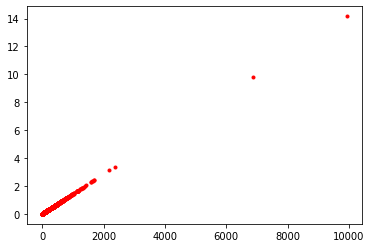

In [14]:
plt.plot(newdata.iloc[:,20],newdata.iloc[:,35],'r.') # correlation เป็น 1 plot กราฟออกมาจะเป็นเส้นตรง

Data ที่มี correlation เป็นค่าอื่นๆ

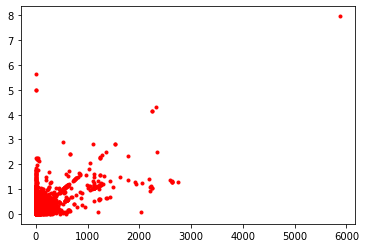

In [15]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'r.') # correlation เป็น 1 plot กราฟออกมาจะกระจาย

ลบ column ซ้ำ

In [16]:
newdata.columns.str.contains('_USRDA') #ใน column ที่มี True จะประกอบไปด้วยคำว่า _USRDA

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [17]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values # เอาเฉพาะ column ที่มี True

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [18]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values, axis=1)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


ลบ Column ที่มีค่า Correlation เป็น 1 เมื่อเทียบกับ Column อื่น

In [19]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [20]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


ทดลอง plot กราฟ parallel coordinate

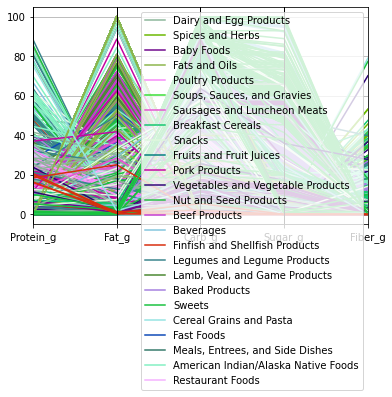

In [21]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

ทำ PCA เพื่อลดจำนวน Dimension ของข้อมูล

In [22]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=2)
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [27]:
new_pca.shape

(8618, 2)

In [28]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

ดูว่ามี food group อะไรบ้าง

In [29]:
FG = set(data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลขเพื่อจะได้ plot สีได้

สร้าง color list แบบข้างล่างนี้ ลำดับจะไม่มีการเปลี่ยนแปลง

In [35]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ### เรียงค่่า สมาชิกจากน้อยไปมาก
color_list1 = {}
num = 0
for each_fg in FG_l:
    if each_fg not in color_list1:
        color_list1[each_fg] = num
        num += 1

In [36]:
color_list1

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด

In [127]:
data_dropped2 = data_dropped.replace(color_list1)
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,23,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,10,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Plot กราฟ Scatter

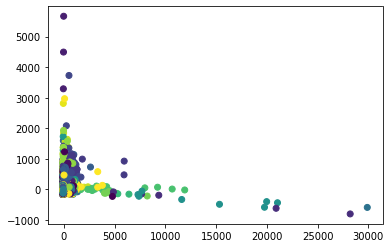

In [128]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

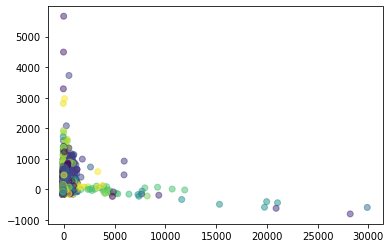

In [129]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5) # alpha คือความโปร่งใส

ทดลองเปรียบเทียบค่าสารอาหาร Cereal Grains and Pasta และ Snacks

In [130]:
a = data_dropped2[(data_dropped2['FoodGroup']==6) | (data_dropped2['FoodGroup']==21)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
a

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
1181,21,69.0,1.82,3.26,8.52,0.72,0.4,26.0,0.010,0.04,2.2,19.0,23.0,0.100,0.64,0.300,1.9,0.028889,0.005882,0.016667,0.024444,0.032667,0.0475,0.038750,0.047692,0.035833,0.019167,0.000111,0.007143,0.044286,0.034545,0.063636
1182,21,91.0,4.83,1.32,15.42,2.49,6.8,22.0,0.070,0.00,0.2,66.0,35.0,0.300,1.50,0.500,0.0,0.024444,0.041176,0.000000,0.002222,0.024000,0.1650,0.025625,0.030000,0.035000,0.029167,0.000333,0.078571,0.107143,0.000000,0.100000
1183,21,40.0,2.38,1.59,4.76,0.79,0.0,0.0,0.000,0.00,0.0,0.0,0.0,0.000,0.29,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1184,21,129.0,5.88,4.42,16.97,3.00,5.9,34.0,0.031,0.03,1.2,24.0,60.0,0.300,1.53,0.500,6.4,0.037778,0.018235,0.012500,0.013333,0.058000,0.0600,0.026312,0.019231,0.054167,0.050000,0.000333,0.078571,0.140000,0.116364,0.070000
1185,21,142.0,7.60,5.31,16.75,0.00,4.6,33.0,0.100,0.06,0.7,24.0,66.0,0.300,1.78,0.600,6.9,0.036667,0.058824,0.025000,0.007778,0.000000,0.0600,0.048750,0.037692,0.069167,0.055000,0.000333,0.088095,0.180000,0.125455,0.081818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7733,21,160.0,1.00,0.52,37.92,30.95,1.4,14.0,0.093,0.00,0.2,0.0,40.0,0.072,1.09,0.178,0.0,0.015556,0.054706,0.000000,0.002222,0.064000,0.0000,0.049188,0.056154,0.022500,0.033333,0.000080,0.038095,0.034286,0.000000,0.020000
7734,21,132.0,0.44,1.41,29.45,23.49,0.5,1.0,0.015,0.00,0.0,0.0,20.0,0.015,0.15,0.071,0.0,0.001111,0.008824,0.000000,0.000000,0.014000,0.0000,0.010000,0.016923,0.012500,0.016667,0.000017,0.011905,0.024286,0.000000,0.010909
7735,21,257.0,6.31,16.02,22.02,17.07,1.8,0.0,0.190,0.00,0.0,22.0,22.0,0.123,0.91,0.484,3.4,0.000000,0.111765,0.000000,0.000000,0.148667,0.0550,0.200000,0.097692,0.050000,0.018333,0.000137,0.107143,0.152857,0.061818,0.070909
7736,21,50.0,1.16,0.51,10.28,2.78,1.1,56.0,0.070,0.00,0.7,0.0,25.0,0.046,0.40,0.089,0.0,0.062222,0.041176,0.000000,0.007778,0.012000,0.0000,0.038125,0.076923,0.041667,0.020833,0.000051,0.028571,0.040000,0.000000,0.021818


In [131]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(a.iloc[:,1:].to_numpy())

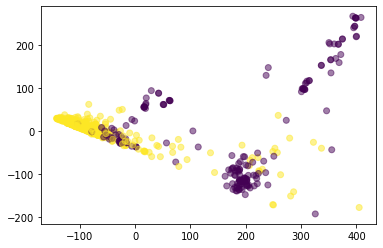

In [132]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = a['FoodGroup'],alpha=0.5)

In [133]:
Pasta_pca = pca.transform(a[a['FoodGroup']==6].iloc[:,1:].to_numpy())
Snacks_pca = pca.transform(a[a['FoodGroup']==21].iloc[:,1:].to_numpy())

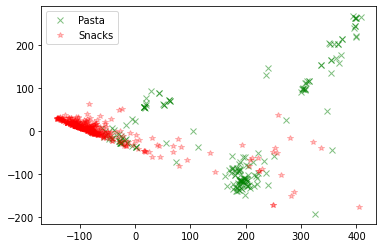

In [134]:
plt.plot(Pasta_pca[:,0],Pasta_pca[:,1],'xg',alpha=0.5,label='Pasta')
plt.plot(Snacks_pca[:,0],Snacks_pca[:,1],'*r',alpha=0.25,label='Snacks')
plt.legend()

2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [135]:
pca.explained_variance_ratio_

array([0.73012982, 0.15166226])

การใส่ชื่อกราฟ และ แกน

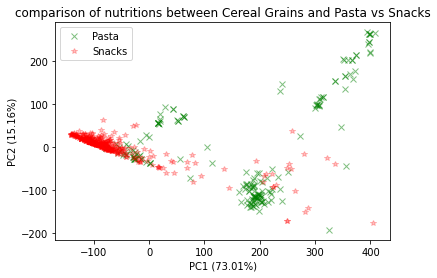

In [139]:
plt.plot(Pasta_pca[:,0],Pasta_pca[:,1],'xg',alpha=0.5,label='Pasta')
plt.plot(Snacks_pca[:,0],Snacks_pca[:,1],'*r',alpha=0.25,label='Snacks')
plt.legend()
plt.title('comparison of nutritions between Cereal Grains and Pasta vs Snacks')
plt.xlabel('PC1 (73.01%)')
plt.ylabel('PC2 (15.16%)');

จากการเปรียบเทียบสารอาหารระหว่าง Cereal Grains and Pasta และ Snacks แล้ว PC1 + PC2 ได้ 88.17% ดังนั้น component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance ประมาณ 80–90% แสดงว่าครอบคลุม

#2.Pizza

In [142]:
import pandas as pd #นำเข้าข้อมูล CSV และอ่านข้อมูลจากไฟล์ที่นำเข้า

In [143]:
Pizza_data = pd.read_csv('/content/Pizza.csv')    #แสดง data
Pizza_data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [144]:
Pizza_data = pd.read_csv('/content/Pizza.csv')
Pizza_data.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัวและมีกี่ dimension

In [145]:
Pizza_data.shape #จำนวนแถว , จำนวน column

(300, 9)

Plot scatter matrix เพื่อดูการกระจายของ data ในมุมต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f744684ab10>,
      dtype=object)

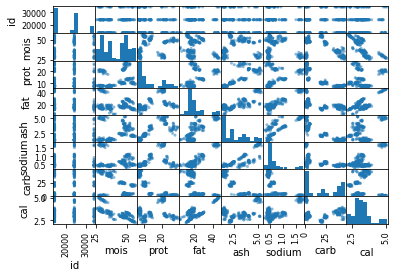

In [146]:
pd.plotting.scatter_matrix(Pizza_data)

ทดสอบว่า column ใดให้ข้อมูลซ้ำกับ column อื่นแล้วลบออก เลือกข้อมูลมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข

In [160]:
NewPizza = Pizza_data.iloc[:,2:] #เริ่มจาก column ที่ 2 เนื่องจาก column 0 และ column 1 เป็นชื่อแบรนด์และไอดีของข้อมูลตามลำดับไม่ใช่ตัวเลขที่นำมาพลอตกราฟได้
NewPizza.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


ตรวจสอบว่าระหว่าง column มี correlation กัน มาก-น้อย แค่ไหน ด้วย numpy

In [148]:
import numpy as np

In [150]:
corr = np.corrcoef(NewPizza.to_numpy().T)

In [151]:
corr.shape

(7, 7)

In [152]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

In [154]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') #รันแล้วค่าไม่แสดงออกมาแปลว่า ไม่มีค่าที่ซ้ำกัน

ลบ column ที่ไม่ใช่ตัวเลขออก

In [159]:
NewPizza_dropped = Pizza_data.drop(['brand','id'], axis=1) #ลบ column brand และ id ออกจากตาราง
NewPizza_dropped

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [161]:
NewPizza_dropped2 = Pizza_data.drop(['id'], axis=1) #ลบแค่ column id เพราะต้องเอา brand แต่ละ brand มาเปรียบเทียบในกราฟ
NewPizza_dropped2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


ทดลอง plot กราฟ parallel coordinate

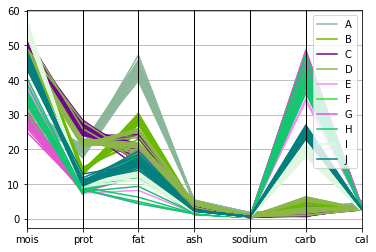

In [158]:
pd.plotting.parallel_coordinates(NewPizza_dropped2,'brand',cols=['mois','prot','fat','ash','sodium','carb','cal']) #เป็นการพลอตกราฟสารอาหารของ brand ตั้งแต่ brand A-J

ทำ PCA เพื่อลดจำนวน dimension ของข้อมูล

In [163]:
from sklearn.decomposition import PCA   #Import

In [166]:
pca = PCA(n_components=2) #Define  #เลข 2 เพราะกราฟประกอบด้วยแกน X,Y
new_pca = pca.fit_transform(NewPizza_dropped.to_numpy())  #Fit - Transform

In [167]:
new_pca.shape

(300, 2)

In [168]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

ดูว่ามี brand อะไรบ้าง

In [169]:
B = set(Pizza_data['brand'])
B

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

สร้าง dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลขเพื่อจะได้ plot สีได้

สร้าง color list แบบข้างล่างนี้ ลำดับจะไม่มีการเปลี่ยนแปลง

In [173]:
B_l = list(B)  # แปลงเป็น list
B_l.sort() # เรียงค่่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
for each_fg in B_l:
    if each_fg not in color_list2:
        color_list2[each_fg] = num
        num += 1

In [174]:
color_list2

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

แทนค่า text ใน dictionary ด้วยตัวเลขที่เรากำหนด

In [176]:
NewPizza_dropped3 = NewPizza_dropped2.replace(color_list2)
NewPizza_dropped3  #จากข้อมูลคอลัมน์ brand จะเปลี่ยนเป็น 9 ตัวเลขตั้งแต่ 0-9 นั่นคือนำตัวเลขที่เรากำหนดจาก color_list2 มาแทนตัวอักษรในตาราง

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


Plot กราฟ scatter

In [178]:
from matplotlib import pyplot as plt #เอาไว้เรียกใช้ plt

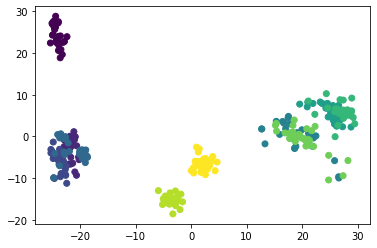

In [179]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = NewPizza_dropped3['brand'])

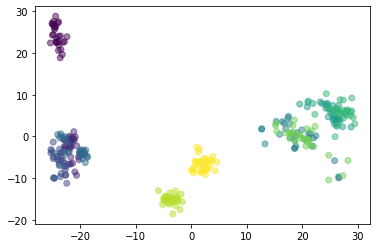

In [180]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = NewPizza_dropped3['brand'],alpha=0.5) #alpha คือความโปร่งใส

ทดลองเปรียบเทียบค่าสารอาหาร ระหว่าง brand D และ I

In [190]:
aa = NewPizza_dropped3[(NewPizza_dropped3['brand']==3) | (NewPizza_dropped3['brand']==8)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
aa

,brand,mois,prot,fat,ash,sodium,carb,cal
87,3,46.64,21.38,24.96,4.60,0.77,2.42,3.20
88,3,45.93,21.60,25.87,4.51,0.73,2.09,3.28
89,3,47.60,22.07,21.13,4.07,0.72,5.13,2.99
90,3,47.61,22.44,19.61,4.06,0.60,6.28,2.91
91,3,46.91,21.79,21.17,4.06,0.76,6.07,3.02
...,...,...,...,...,...,...,...,...
263,8,57.22,9.66,10.95,2.04,0.47,20.13,2.18
264,8,54.80,10.57,13.42,2.08,0.50,19.13,2.40
265,8,54.17,10.13,13.25,2.07,0.46,20.38,2.41
266,8,53.57,10.73,12.78,2.16,0.48,20.76,2.41


In [191]:
pca = PCA(n_components=2) # ใช้ 2 dimention เพราะเปรียบเทียบแค่ 2 brand
new_pca2 = pca.fit_transform(aa.iloc[:,1:].to_numpy())

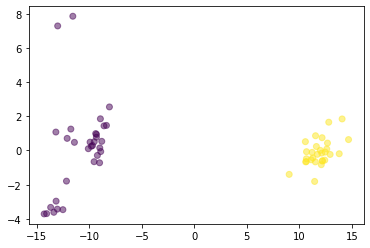

In [192]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = aa['brand'],alpha=0.5)

In [199]:
D_pca = pca.transform(aa[aa['brand']==3].iloc[:,1:].to_numpy())
I_pca = pca.transform(aa[aa['brand']==8].iloc[:,1:].to_numpy())

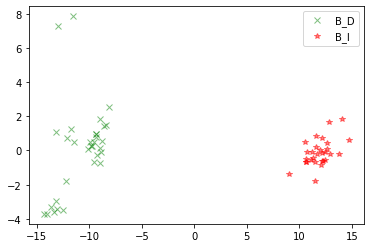

In [204]:
plt.plot(D_pca[:,0],D_pca[:,1],'xg',alpha=0.5,label='B_D')
plt.plot(I_pca[:,0],I_pca[:,1],'*r',alpha=0.5,label='B_I')
plt.legend()

2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [197]:
pca.explained_variance_ratio_

array([0.96201888, 0.02908381])

การใส่ชื่อกราฟ และ แกน

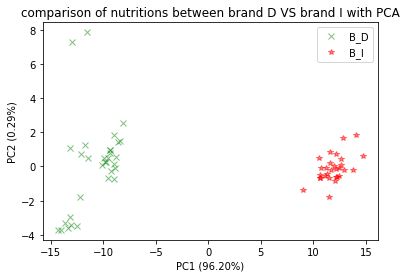

In [205]:
plt.plot(D_pca[:,0],D_pca[:,1],'xg',alpha=0.5,label='B_D')
plt.plot(I_pca[:,0],I_pca[:,1],'*r',alpha=0.5,label='B_I')
plt.legend()
plt.title('comparison of nutritions between brand D VS brand I with PCA') #ตั้งชื่อกราฟ
plt.xlabel('PC1 (96.20%)') #ชื่อแกน X
plt.ylabel('PC2 (0.29%)'); #ชื่อแกน Y

จากการเปรียบเทียบสารอาหารระหว่าง Cereal Grains and Pasta และ Snacks แล้ว PC1 + PC2 ได้ 96.49% ดังนั้น component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance ประมาณ 80–90% แสดงว่าครอบคลุม